## Observations and Insights 

# Overall Conclusions from this study

## First Conclusion

### Based off of the data presented in the summary table, as well as the box plot - it is clear that the most effective treatment was Ramicane, but only by a small margin

### The gender data in this study was fairly equal with both groups (male and female) landing ~50% of the group. Ideally this shows that there are no major difference in drug effectiveness based off of gender

### Lastly, we can conclude that there is a direct, positive relationship with mouse weight and tumor size - meaning, if a mouse is heavier - they are much more likely to have a larger tumor when compared to a lighter mouse

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse = "Mouse_metadata.csv"
study = "Study_results.csv"

# Read the mouse data and the study results
mouse_md = pd.read_csv(mouse)
study_r = pd.read_csv(study)

# Combine the data into a single dataset
mergeData = pd.merge(mouse_md,study_r, how='left',on='Mouse ID')

# Display the data table for preview
mergeData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
totalMice = mergeData['Mouse ID'].nunique()
totalMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# g989 is our duplicate mouse because it has more times than all other micd
mergeData['Mouse ID'].value_counts()

g989    13
b879    10
q597    10
j755    10
o331    10
        ..
x226     1
v199     1
n482     1
u153     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseIndex = mergeData.set_index('Mouse ID')
duplicateMouse = mouseIndex.loc['g989',:]
duplicateMouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMouse = mouseIndex.drop(index='g989')
mouse_data = cleanMouse.reset_index()

In [6]:
# Checking the number of mice in the clean DataFrame.
newMouseCount = mouse_data['Mouse ID'].nunique()
newMouseCount

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'

meanDrugs = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

medianDrugs = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

varianceDrugs = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

standevDrugs = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

semDrugs = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Summary_1 = {
    'Mean':meanDrugs,
    'Median':medianDrugs,
    'Variance':varianceDrugs,
    'Standard Deviation':standevDrugs,
    'SEM':semDrugs
}

summary = pd.DataFrame(Summary_1)
display(summary)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# This is way better - geez

summary2 = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

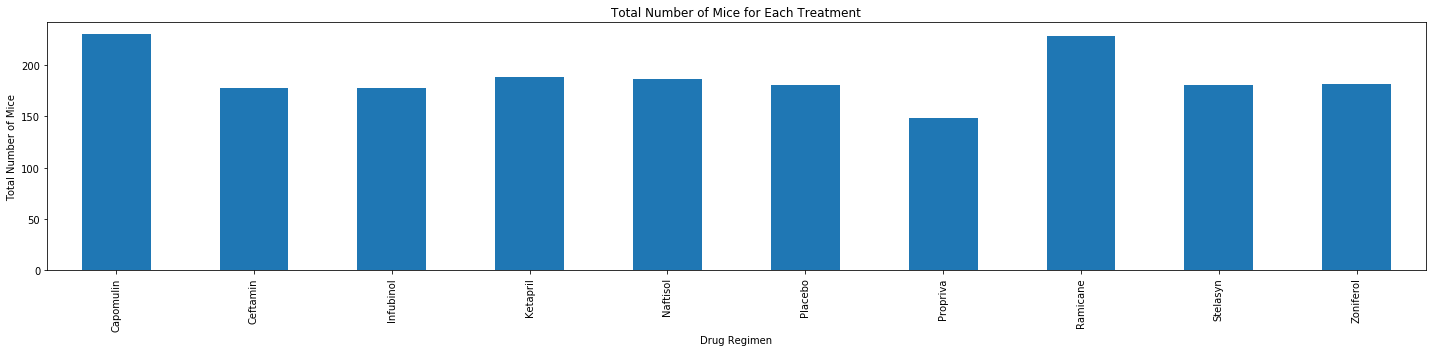

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# created a new dataframe that grouped the mice by the drug regimen they were on, and the various timepoints
# this way I could see the attendence for a given treatment throughout the study

micePerDrug = mouse_data.groupby('Drug Regimen').count()

x = micePerDrug['Mouse ID']
x

x.plot(kind='bar', figsize=(20,5))
plt.title('Total Number of Mice for Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.tight_layout()
plt.show()


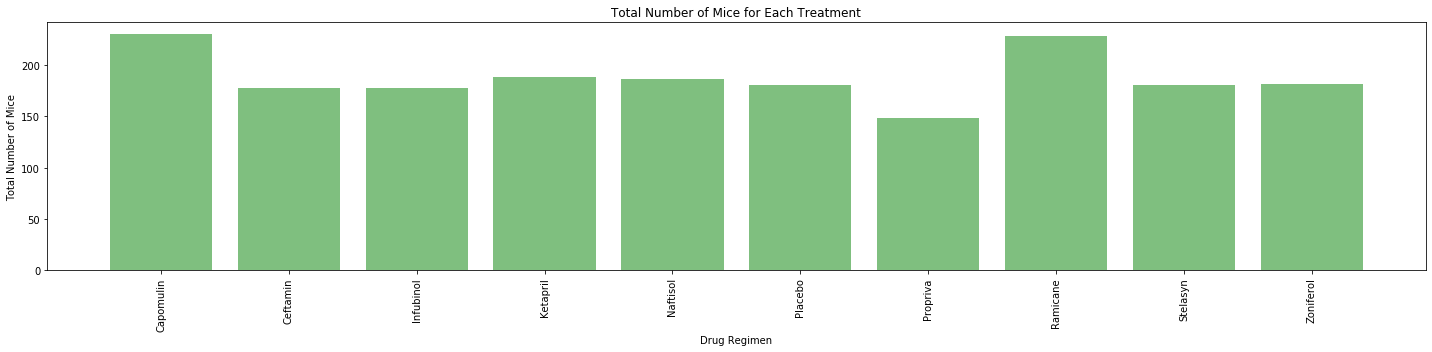

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(micePerDrug))
tick_locations = [value for value in x_axis]
y_axis = [value for value in micePerDrug.index]

plt.figure(figsize=(20,5))
plt.bar(x_axis,micePerDrug['Mouse ID'],color='g', alpha=0.5, align='center')
plt.xticks(tick_locations,y_axis,rotation='vertical')
plt.title('Total Number of Mice for Each Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')
plt.tight_layout()
plt.show()

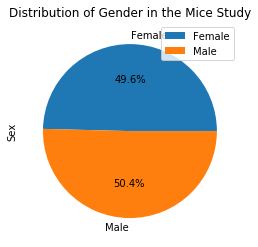

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouseGender = mouse_data.groupby('Sex').nunique()

maleCount = mouseGender.loc['Male','Mouse ID']
femaleCount = mouseGender.loc['Female','Mouse ID']

newDict = {'Sex':{
    'Male':maleCount,
    'Female':femaleCount
}}

keys = newDict['Sex'].keys()

newDF = pd.DataFrame(newDict)

newDF.plot(kind='pie',y='Sex',legend='best',autopct='%1.1f%%')
plt.title('Distribution of Gender in the Mice Study')
plt.show()

Text(0.5, 1.0, 'Distribution of Gender in the Mice Study')

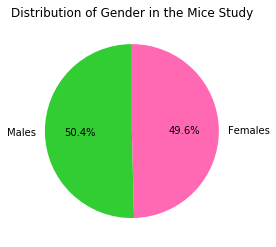

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

listGender = [maleCount,femaleCount]

labelGender = ['Males','Females']

colorsGender = ['limegreen','hotpink']

plt.pie(listGender,labels=labelGender, colors=colorsGender,autopct="%1.1f%%",startangle=90)
plt.title('Distribution of Gender in the Mice Study')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Generate my list of drugs

drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# create a new dataframe that only contains data from the above list of treatments

tumor = mouse_data[mouse_data['Drug Regimen'].isin(drug_list)]

# find the last timepoint for each mouse in each treatment
tumor1 = tumor.loc[tumor['Timepoint'] == tumor['Timepoint'].iloc[-1],:]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)

tumor2 = tumor1[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# for loop that generates these values for me

for drug in drug_list:
    drug_df = tumor2.loc[tumor2['Drug Regimen'] == drug]
    drugQuart = drug_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    drugLower = drugQuart[0.25]
    drugUpper = drugQuart[0.75]
    drugIQR = drugUpper - drugLower
    drugLowerBound = drugLower - (1.5*drugIQR)
    drugUpperBound = drugUpper + (1.5*drugIQR)
    print(f'The drug: {drug} has an IQR of {drugIQR}')
    print(f'Its lower quartile is {drugLower}, and its upper quartile is {drugUpper}')
    print(f'Its lower bound is {drugLowerBound}, and its upper bound is {drugUpperBound}')
    print("")
    for index, row in drug_df.iterrows():
        if row['Tumor Volume (mm3)'] > drugUpperBound:
            print('This following mouse exceeds the upper bounds of this data')
            print("")
            print(row)
        elif row['Tumor Volume (mm3)'] < drugLowerBound:
            print('This following mouse is below the lower bounds of this data')
            print("")
            print(row)
    

The drug: Capomulin has an IQR of 7.781863460000004
Its lower quartile is 32.37735684, and its upper quartile is 40.1592203
Its lower bound is 20.70456164999999, and its upper bound is 51.83201549

The drug: Ramicane has an IQR of 7.527130082499998
Its lower quartile is 30.981175224999998, and its upper quartile is 38.508305307499995
Its lower bound is 19.690480101250003, and its upper bound is 49.79900043124999

The drug: Infubinol has an IQR of 4.9311172099999965
Its lower quartile is 62.75445141, and its upper quartile is 67.68556862
Its lower bound is 55.35777559500001, and its upper bound is 75.08224443499999

The drug: Ceftamin has an IQR of 6.093590140000003
Its lower quartile is 61.43389223, and its upper quartile is 67.52748237
Its lower bound is 52.29350701999999, and its upper bound is 76.66786758



{'whiskers': [<matplotlib.lines.Line2D at 0x1d64b0bfec8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d64b107d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d64b107308>,
 'medians': [<matplotlib.lines.Line2D at 0x1d64b111f88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d64b115b08>,
 'means': []}

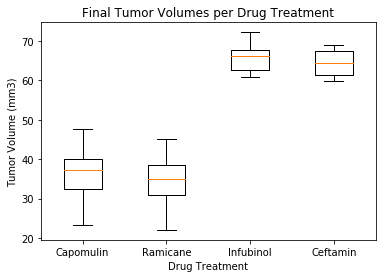

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin = tumor2.loc[tumor2['Drug Regimen'] == 'Capomulin',:]
capomulinTumors = capomulin['Tumor Volume (mm3)']


ramicane = tumor2.loc[tumor2['Drug Regimen'] == 'Ramicane',:]
ramicaneTumors = ramicane['Tumor Volume (mm3)']

infubinol = tumor2.loc[tumor2['Drug Regimen'] == 'Infubinol',:]
infubinolTumors = infubinol['Tumor Volume (mm3)']


ceftamin = tumor2.loc[tumor2['Drug Regimen'] == 'Ceftamin',:]
ceftaminTumors = ceftamin['Tumor Volume (mm3)']

neededData = [capomulinTumors,ramicaneTumors,infubinolTumors,ceftaminTumors]

fig1,ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes per Drug Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Treatment')
ax1.boxplot(neededData,labels=drug_list)


## Line and Scatter Plots

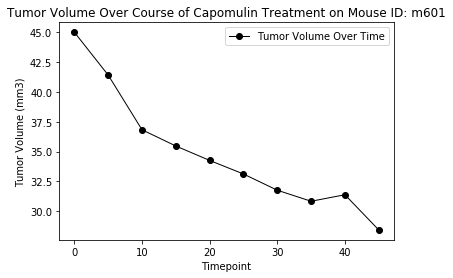

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Mouse I selected: m601

m601_data = mouse_data.loc[mouse_data['Mouse ID'] == 'm601',:]
timepoints = [value for value in m601_data['Timepoint']]
tumorVolume = [value for value in m601_data['Tumor Volume (mm3)']]

plt.plot(timepoints,tumorVolume,marker='o',color='black',linewidth=1,label="Tumor Volume Over Time")
plt.legend(loc='best')
plt.title('Tumor Volume Over Course of Capomulin Treatment on Mouse ID: m601')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


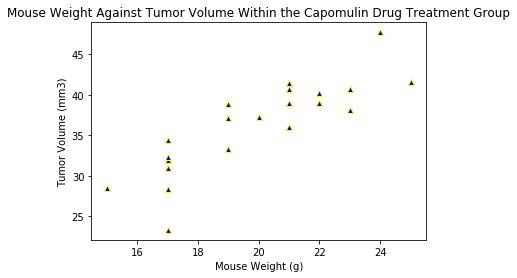

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin2 = tumor1.loc[tumor1['Drug Regimen'] == 'Capomulin',:]

mouseWeights = [value for value in capomulin2['Weight (g)']]
mouseTumors = [value for value in capomulin2['Tumor Volume (mm3)']]

plt.scatter(mouseWeights,mouseTumors,marker='^',facecolors='b',edgecolors='yellow')
plt.title('Mouse Weight Against Tumor Volume Within the Capomulin Drug Treatment Group')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_value = capomulin2['Weight (g)']
y_value = capomulin2['Tumor Volume (mm3)']

correlation = st.pearsonr(x_value,y_value)

print(f'The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}')

The correlation between mouse weight and average tumor volume is 0.85


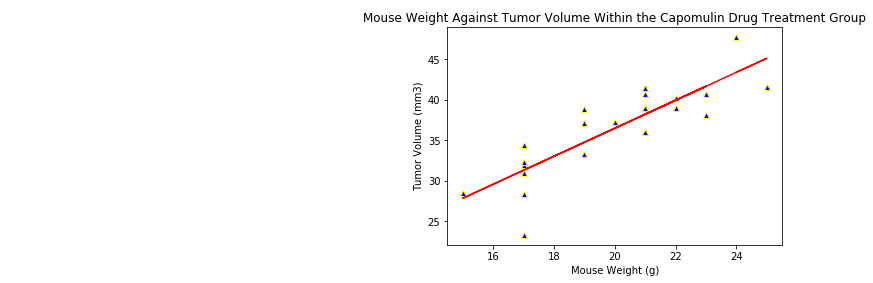

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value,y_value)
regress_values = x_value * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouseWeights,mouseTumors,marker='^',facecolors='b',edgecolors='yellow')
plt.plot(mouseWeights,regress_values, "r-")
plt.title('Mouse Weight Against Tumor Volume Within the Capomulin Drug Treatment Group')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.show()

In [24]:
print(f'The equation for the linear regression is {line_eq}')

The equation for the linear regression is y= 1.72x + 2.0
